<a href="https://colab.research.google.com/github/snatched11/100-Days-Of-PyTorch/blob/main/Day%205%20-%20nn.Module%2C%20nn.Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**USING nn.Module, nn.Linear & Optimizers**

* Understand what nn.Module is and why it exists

* Replace manual weights with nn.Linear

* Use PyTorch optimizers instead of manually updating W & b

* Build a clean training loop

* scale to multi-layer networks

In [24]:
import torch
import torch.nn as nn
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

In [25]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output

    def forward(self, x):
        return self.linear(x)

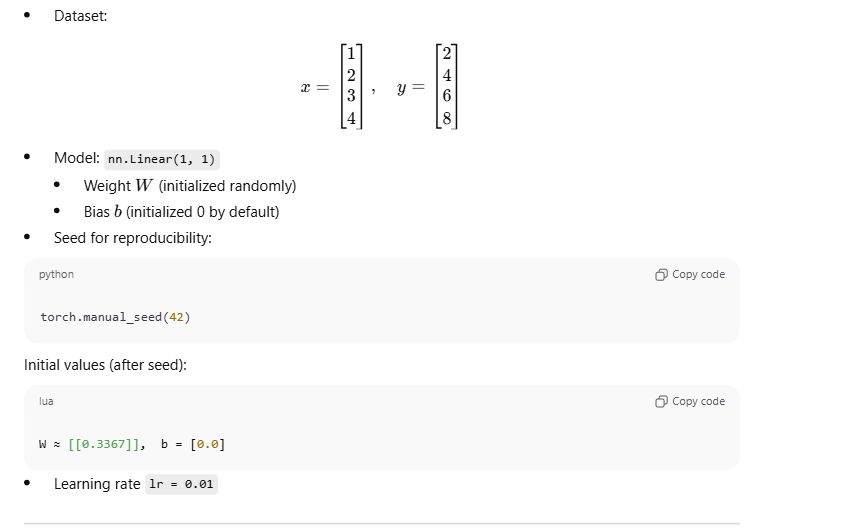

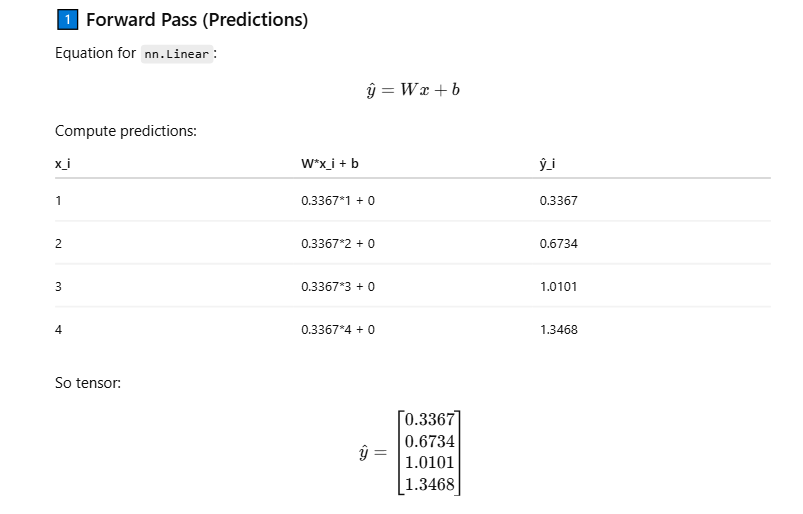

In [26]:
model = LinearModel()
print(model)

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [27]:
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

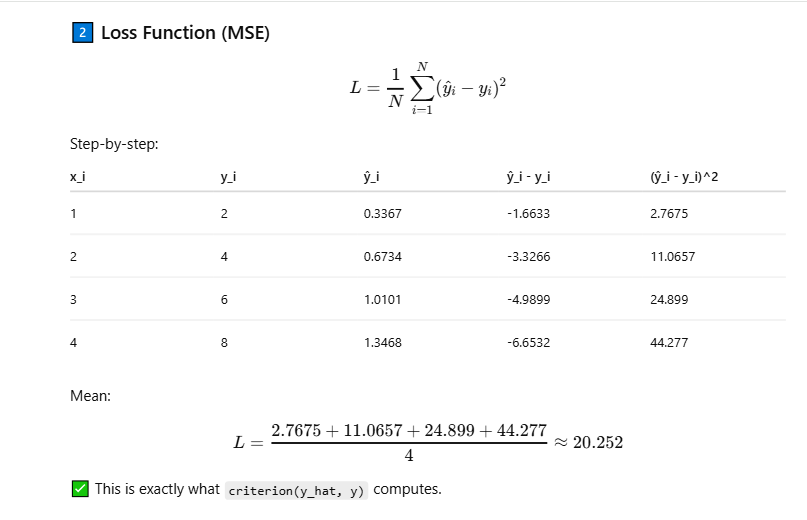

In [28]:
for epoch in range(1000):

    # 1️⃣ Forward pass: compute predictions
    y_hat = model(x)

    # 2️⃣ Compute loss
    loss = criterion(y_hat, y)

    # 3️⃣ Backward pass: compute gradients
    optimizer.zero_grad()    # FIRST: clear old gradients
    loss.backward()          # THEN: compute new gradients

    # 4️⃣ Update weights
    optimizer.step()         # apply gradient descent

    # 5️⃣ Logging
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")


Epoch 0, Loss: 9.646211624145508
Epoch 100, Loss: 0.04001116380095482
Epoch 200, Loss: 0.02196568436920643
Epoch 300, Loss: 0.012058870866894722
Epoch 400, Loss: 0.006620170082896948
Epoch 500, Loss: 0.003634396241977811
Epoch 600, Loss: 0.0019952431321144104
Epoch 700, Loss: 0.0010953705059364438
Epoch 800, Loss: 0.0006013385718688369
Epoch 900, Loss: 0.00033013278152793646


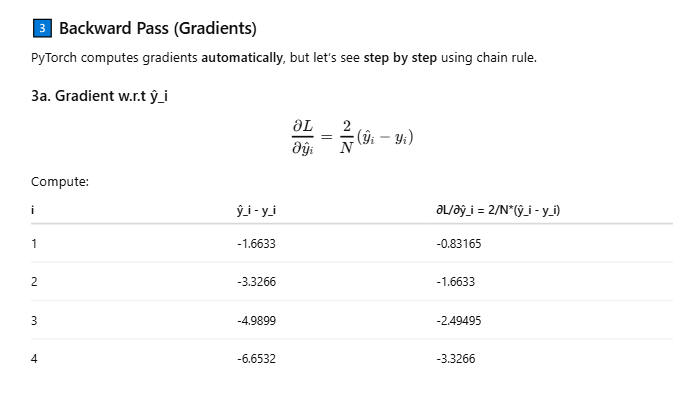

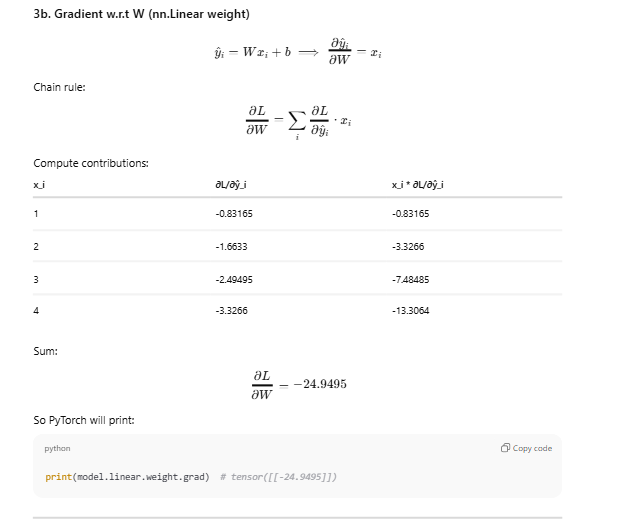

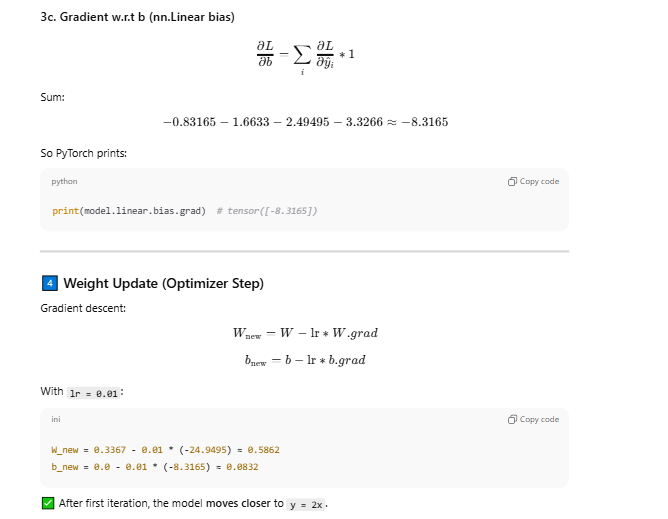

Summary

* Always zero gradients before backward pass

* Forward → Loss → Zero grads → Backward → Step

This exact pattern scales to deep networks, MLPs, and eventually transformers & LLMs

**What is nn.Module and why is it important?**

nn.Module is the base class for all PyTorch models. It allows you to define layers and parameters (like nn.Linear weights and biases) in a structured way. PyTorch automatically tracks these parameters for gradients and device placement. Without nn.Module, you would need to manage weights, biases, and gradient tracking manually.

**What does nn.Linear do internally ?**

nn.Linear(in_features, out_features) defines a fully connected layer with learnable parameters:

Weight matrix W of shape (out_features, in_features)

Bias vector b of shape (out_features)
Forward pass computes:

 y^​=Wx+b

PyTorch also attaches a computation graph so .backward() computes gradients automatically.

**Why do we use optimizer.zero_grad()?**

PyTorch accumulates gradients by default. If you don’t reset gradients at the start of each iteration, gradients from previous steps will be added to current gradients, causing wrong weight updates.
So always call:

optimizer.zero_grad()


before loss.backward().

**How does optimizer.step() work?**

optimizer.step() updates all parameters using the gradients computed in loss.backward().

Example (SGD): W←W−lr∗W.grad

b←b−lr∗b.grad

You don’t manually update W or b; the optimizer handles it